# Module 2, Section 6: Time Series Plots

Time series are sequences of discrete, ordered time data. The simplest way to visualise them is with a line chart, where the x-axis is time, and the y-axis is the continuous variable being measured through time. We'll use the taxis dataset for these exercises.

In [21]:
# import packages/libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

# load (and optionally format) dataset
df = pd.read_csv("data/taxis.csv")
df["pickup"] = pd.to_datetime(df["pickup"])
df["dropoff"] = pd.to_datetime(df["dropoff"])

# Add a new column, giving the duration of each trip in minutes
duration = df["dropoff"]-df["pickup"] #calculating trip duration as timedelta datatype
df["duration_min"] = duration.dt.total_seconds()/60 #converting to minutes and adding to df

As our data has such fine detail of entries, before we start, let's aggregate the records by each day and pickup borough using the **groupby** [command](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [22]:
df_gb=df.groupby(by=[pd.Grouper(key="pickup",freq="D"),'pickup_borough'])
df_gb_sum=df_gb.sum().reset_index()
df_gb_sum

,pickup,pickup_borough,passengers,distance,fare,tip,tolls,total,duration_min
0,2019-02-28,Queens,1,0.90,5.00,0.00,0.00,6.30,3.0
1,2019-03-01,Bronx,7,21.30,113.26,1.36,0.00,123.42,169.0
2,2019-03-01,Brooklyn,17,83.19,313.62,15.68,0.00,353.05,352.0
3,2019-03-01,Manhattan,300,412.47,2058.00,394.33,31.54,3169.47,2355.0
4,2019-03-01,Queens,43,122.46,454.59,28.60,28.80,553.29,499.0
...,...,...,...,...,...,...,...,...,...
118,2019-03-30,Queens,37,160.60,501.70,73.85,28.80,641.25,476.0
119,2019-03-31,Bronx,1,14.45,42.00,0.00,5.76,48.56,31.0
120,2019-03-31,Brooklyn,15,51.36,204.50,17.05,0.00,246.70,227.0
121,2019-03-31,Manhattan,250,312.87,1541.00,294.80,11.52,2341.47,1665.0


**Exercise:** 
1) In your own words, comment each line of code above, explaining succinctly what it is doing.\
2) Create a dataframe called df_gb_ave, which gives the means of the different variables across pickup day and pickup borough.

Now let's start to plot. We'll use the Matplotlib command **plot**, but we could use other libraries like Seaborn. 

**Exercise:** As we work through these activities, try to make each figure in Seaborn as well (you'll be able to do most in a single line of code). Use [this page](http://seaborn.pydata.org/generated/seaborn.lineplot.html) as a starting reference.

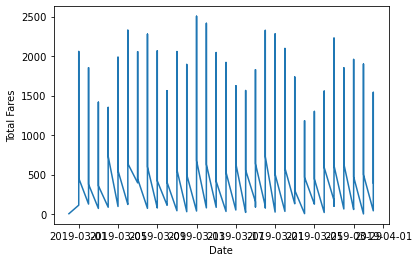

In [23]:
fig, ax = plt.subplots()
ax.plot(df_gb_sum.pickup, df_gb_sum.fare)
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.show()

What's going on? Remember, we grouped observations by date and pickup borough. So, for each date, Matplotlib is fitting a line through all of the observations. We need to subset our data first, then plot each line seperately. As an aside, what happens if plot something similar with Seaborn? Let's see:

<AxesSubplot:xlabel='pickup', ylabel='fare'>

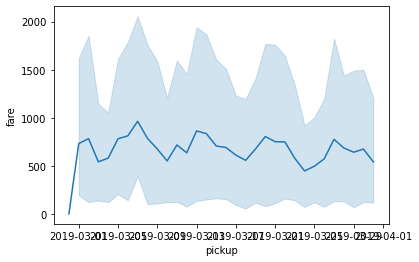

In [24]:
sns.lineplot(data=df_gb_sum,y='fare',x='pickup')
# You'll notice it's all squished - we can fix that using seaborns set_theme function, but we'll come back to that later

Seaborn plots the mean fare across boroughs as a solid line, with the shading giving the standard error across boroughs for each date. Clever! However, the tradeoff here is we have less direct control over our figure. Let's get back to Matplotlib.

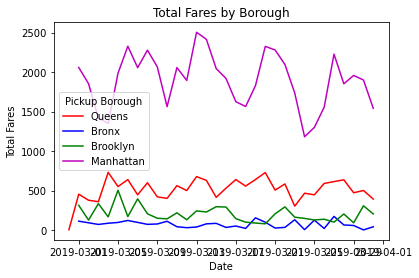

In [26]:
label_names = ["Queens", "Bronx", "Brooklyn", "Manhattan"]

df_gb_sum_0 = df_gb_sum[df_gb_sum.pickup_borough == label_names[0]]
df_gb_sum_1 = df_gb_sum[df_gb_sum.pickup_borough == label_names[1]]
df_gb_sum_2 = df_gb_sum[df_gb_sum.pickup_borough == label_names[2]]
df_gb_sum_3 = df_gb_sum[df_gb_sum.pickup_borough == label_names[3]]

fig, ax = plt.subplots()
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough")
plt.show()

Let's pause and unpack some of the new syntax we've just introduced. First, I've specified a list of label_names, then I'm subsetting my dataset by pickup_borough, so for example **df_gb_sum_0** gives me all the data for **label_names[0]**, which is Queens. Doing things this way makes it very easy later on if you wanted to nest some of your plotting function in a **for** loop, and loop over a list of names. We won't look at that in this course though.

You'll notice as well that we're giving each **ax.plot** an object name, followed by a comma. For example **plt1,**. We do this so we can create a legend with all of the lines. Why the comma? Because **ax.plot** can plot more than one line. For example, we could do **plt1** and **plt2** together: 

**ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, df_gb_sum_1.pickup, df_gb_sum_1.fare)**

We don't tend to do this, because it gets messy fast. But, because **ax.plot** can do this, it returns a list of lines, even if we're only specifying a single line. The comma tells Matplotlib we only want to unpack the first line. We do this so we can call the plot objects **plt1**, **plt2** etc in the legend.

This looks okay, but the dates are squished together and the legend is obscuring some of the plot. We can fix this by changing the figure size (see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html)) and the position of the legend (see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)). We'll experiment with the legend location in the next Module.

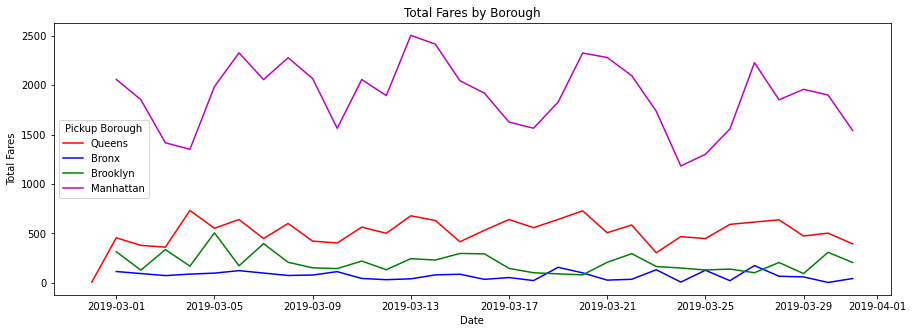

In [29]:
#label_names = ["Queens", "Bronx", "Brooklyn", "Manhattan"]

fig, ax = plt.subplots(figsize=(15, 5))
plt1, = ax.plot(df_gb_sum_0.pickup, df_gb_sum_0.fare, c = "r", label = label_names[0])
plt2, = ax.plot(df_gb_sum_1.pickup, df_gb_sum_1.fare, c = "b", label = label_names[1])
plt3, = ax.plot(df_gb_sum_2.pickup, df_gb_sum_2.fare, c = "g", label = label_names[2])
plt4, = ax.plot(df_gb_sum_3.pickup, df_gb_sum_3.fare, c = "m", label = label_names[3])
ax.set_title("Total Fares by Borough")
ax.set_xlabel("Date")
ax.set_ylabel("Total Fares")
plt.legend([plt1, plt2, plt3, plt4], # line objects
           label_names, # line labels
           title = "Pickup Borough", loc = "center left", bbox_to_anchor = (1,0.5))
plt.show()

**Exercise:** Remember, time series are sequences of discrete observations ordered by time. But, a line alone can give the impression that the data is continuous in time. Most of the time this is fine, but if we wanted to accentuate that each day is a discrete datapoint, we can add point markers for each day. We can do that by adding **marker = "."** to each **ax.plot** command. Recreate the plot above, with markers for each day on each borough's line. More information about marker styles can be found [here](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).